* Relevant Information:
     This is one of three domains provided by the Oncology Institute
     that has repeatedly appeared in the machine learning literature.
     (See also lymphography and primary-tumor.)

     This data set includes 201 instances of one class and 85 instances of
     another class.  The instances are described by 9 attributes, some of
     which are linear and some are nominal.
* Number of Instances: 286

* Number of Attributes: 9 + the class attribute

* Attribute Information:
   1. Class: no-recurrence-events, recurrence-events
   2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause: lt40, ge40, premeno.
   4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
   5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
   6. node-caps: yes, no.
   7. deg-malig: 1, 2, 3.
   8. breast: left, right.
   9. breast-quad: left-up, left-low, right-up,	right-low, central.
  10. irradiat:	yes, no.

* Missing Attribute Values: (denoted by "?")
   Attribute #:  Number of instances with missing values:
   6.             8
   9.             1.

* Class Distribution:
    1. no-recurrence-events: 201 instances
    2. recurrence-events: 85 instances

# Importer les librairies 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importer les données

In [ ]:
# Making a list of missing value types
missing_values = ['?']
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/breast-cancer.csv', names = ['class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat'], na_values = missing_values)


Counter({'no-recurrence-events': 201, 'recurrence-events': 85})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


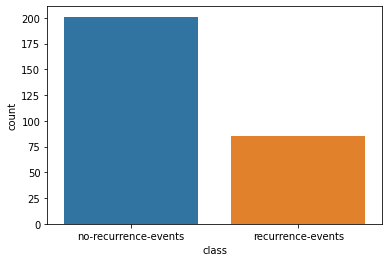

In [ ]:
from collections import Counter
print(Counter(df['class']))
sns.countplot(df['class'])
plt.show()

In [ ]:
# Identify attributes that contain missing values 
df.isnull().any()

class          False
age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps       True
deg-malig      False
breast         False
breast-quad     True
irradiat       False
dtype: bool

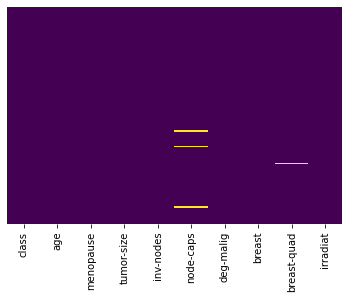

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:

# Afficher les lignes où l'attribut 'node-caps' contient des valeurs manquantes 
df.loc[df['node-caps'].isnull()]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
145,no-recurrence-events,40-49,premeno,25-29,0-2,NaN,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,NaN,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,NaN,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,NaN,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,NaN,3,left,left_low,yes
233,recurrence-events,70-79,ge40,15-19,9-11,NaN,1,left,left_low,yes
263,recurrence-events,50-59,lt40,20-24,0-2,NaN,1,left,left_up,no
264,recurrence-events,50-59,lt40,20-24,0-2,NaN,1,left,left_low,no


In [ ]:
# Afficher les lignes où l'attribut 'breast-quad' contient des valeurs manquantes
df.loc[df['breast-quad'].isnull()]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,NaN,no


In [ ]:
# La valeur la plus fréquente pour l'attribut node-caps est "no"
# La fonction value_counts crée une série de valeurs uniques avec leurs nombres par ordre décroissants
nb_node = df['node-caps'].value_counts()
print(nb_node)
print("la valeur la plus fréquente pour node-caps: ",nb_node.index[0] )


no     222
yes     56
Name: node-caps, dtype: int64
la valeur la plus fréquente pour node-caps:  no


In [ ]:
# La valeur la plus fréquente pour l'attribut breast-quad est "left_low"
nb_bq = df['breast-quad'].value_counts()
print(nb_bq)
print("la valeur la plus fréquente pour breast-quad: ",nb_bq.index[0])

left_low     110
left_up       97
right_up      33
right_low     24
central       21
Name: breast-quad, dtype: int64
la valeur la plus fréquente pour breast-quad:  left_low


In [ ]:
# Remplacer les valeurs manquantes de l'attribut 'node-caps' par la valeur majoritaire
df['node-caps'].fillna(nb_node.index[0], inplace=True)


In [ ]:
# Remplacer les valeurs manquantes de l'attribut 'breast-quad' par la valeur majoritaire
df['breast-quad'].fillna(nb_bq.index[0], inplace=True)


In [ ]:
df.isnull().any()

class          False
age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps      False
deg-malig      False
breast         False
breast-quad    False
irradiat       False
dtype: bool

 **Modification de l'attribut qui prédit la classe**

In [ ]:
# négatif = 0 positif=1 
df['class']=np.where((df['class']=='no-recurrence-events'), 0, 1)
df

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,1,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,1,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,1,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,1,40-49,ge40,30-34,3-5,no,3,left,left_low,no


**Encoder les variables categorielles one hot coding**  

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,1,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,1,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,1,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,1,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
data= pd.get_dummies(df_copy)

In [ ]:
#mon nouveau dataframe
data

,class,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,tumor-size_0-4,tumor-size_10-14,tumor-size_15-19,tumor-size_20-24,tumor-size_25-29,tumor-size_30-34,tumor-size_35-39,tumor-size_40-44,tumor-size_45-49,tumor-size_5-9,tumor-size_50-54,inv-nodes_0-2,inv-nodes_12-14,inv-nodes_15-17,inv-nodes_24-26,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,node-caps_no,node-caps_yes,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
2,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
3,0,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
4,0,2,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
282,1,3,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
283,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
284,1,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   class                  286 non-null    int64
 1   deg-malig              286 non-null    int64
 2   age_20-29              286 non-null    uint8
 3   age_30-39              286 non-null    uint8
 4   age_40-49              286 non-null    uint8
 5   age_50-59              286 non-null    uint8
 6   age_60-69              286 non-null    uint8
 7   age_70-79              286 non-null    uint8
 8   menopause_ge40         286 non-null    uint8
 9   menopause_lt40         286 non-null    uint8
 10  menopause_premeno      286 non-null    uint8
 11  tumor-size_0-4         286 non-null    uint8
 12  tumor-size_10-14       286 non-null    uint8
 13  tumor-size_15-19       286 non-null    uint8
 14  tumor-size_20-24       286 non-null    uint8
 15  tumor-size_25-29       286 non-null    u

In [ ]:
data.columns

Index(['class', 'deg-malig', 'age_20-29', 'age_30-39', 'age_40-49',
       'age_50-59', 'age_60-69', 'age_70-79', 'menopause_ge40',
       'menopause_lt40', 'menopause_premeno', 'tumor-size_0-4',
       'tumor-size_10-14', 'tumor-size_15-19', 'tumor-size_20-24',
       'tumor-size_25-29', 'tumor-size_30-34', 'tumor-size_35-39',
       'tumor-size_40-44', 'tumor-size_45-49', 'tumor-size_5-9',
       'tumor-size_50-54', 'inv-nodes_0-2', 'inv-nodes_12-14',
       'inv-nodes_15-17', 'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8',
       'inv-nodes_9-11', 'node-caps_no', 'node-caps_yes', 'breast_left',
       'breast_right', 'breast-quad_central', 'breast-quad_left_low',
       'breast-quad_left_up', 'breast-quad_right_low', 'breast-quad_right_up',
       'irradiat_no', 'irradiat_yes'],
      dtype='object')

# Data augmentation

In [ ]:
#créer un numpy array et affecter des valeurs random aux colonnes ( pour la première les valeurs sont entre & et 3 inclus et pour les autres entre 0 et 1)

list_data=np.zeros((1900,40))
#print(list_data.shape)
for i in range(1900):
  for j in range(1,40):
    if j==1:
      list_data[i,j]=np.random.randint(1,4)
    else:    
      list_data[i,j]=np.random.randint(0,2)

In [ ]:
list_data= list_data.astype('int32')

In [ ]:
list_data

array([[0, 3, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 2, 0, ..., 1, 1, 0],
       [0, 2, 0, ..., 1, 1, 1],
       [0, 3, 1, ..., 0, 1, 0]], dtype=int32)

## affecter la classe

In [ ]:
#transformer le numpy array en dataframe
new_df= pd.DataFrame(list_data, columns=data.columns)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   class                  1900 non-null   int32
 1   deg-malig              1900 non-null   int32
 2   age_20-29              1900 non-null   int32
 3   age_30-39              1900 non-null   int32
 4   age_40-49              1900 non-null   int32
 5   age_50-59              1900 non-null   int32
 6   age_60-69              1900 non-null   int32
 7   age_70-79              1900 non-null   int32
 8   menopause_ge40         1900 non-null   int32
 9   menopause_lt40         1900 non-null   int32
 10  menopause_premeno      1900 non-null   int32
 11  tumor-size_0-4         1900 non-null   int32
 12  tumor-size_10-14       1900 non-null   int32
 13  tumor-size_15-19       1900 non-null   int32
 14  tumor-size_20-24       1900 non-null   int32
 15  tumor-size_25-29       1900 non-null  

**effectuer un knn pour attribuer les classes aux données générées**

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [ ]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]


In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [ ]:
#trouver le k le plus optimal
errors = []
for k in range(1,30):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
k_opti = errors.index(min(errors))		


In [ ]:
print(errors)
print(k_opti)
print(errors[k_opti])


[29.47368421052632, 32.631578947368425, 31.57894736842105, 36.8421052631579, 30.526315789473678, 35.78947368421053, 33.684210526315795, 35.78947368421053, 33.684210526315795, 37.89473684210526, 36.8421052631579, 35.78947368421053, 36.8421052631579, 36.8421052631579, 35.78947368421053, 35.78947368421053, 34.73684210526316, 35.78947368421053, 36.8421052631579, 37.89473684210526, 35.78947368421053, 36.8421052631579, 36.8421052631579, 38.94736842105263, 37.89473684210526, 38.94736842105263, 38.94736842105263, 38.94736842105263, 38.94736842105263]
0
29.47368421052632


In [ ]:
knn = neighbors.KNeighborsClassifier(k_opti+1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_guessed= knn.predict(new_df.iloc[:,0:39])


In [ ]:
y_guessed

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(new_df.iloc[:,0])

0       0
1       0
2       0
3       0
4       0
       ..
1895    0
1896    0
1897    0
1898    0
1899    0
Name: class, Length: 1900, dtype: int32


In [ ]:
new_df["class"]=y_guessed

In [ ]:
new_df

,class,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,tumor-size_0-4,tumor-size_10-14,tumor-size_15-19,tumor-size_20-24,tumor-size_25-29,tumor-size_30-34,tumor-size_35-39,tumor-size_40-44,tumor-size_45-49,tumor-size_5-9,tumor-size_50-54,inv-nodes_0-2,inv-nodes_12-14,inv-nodes_15-17,inv-nodes_24-26,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,node-caps_no,node-caps_yes,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,0,3,1,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1
1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0
3,0,1,1,0,1,0,1,0,0,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,0,1,1
4,0,3,0,0,1,0,1,1,1,0,0,0,1,1,1,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0,3,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1
1896,0,2,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,0
1897,0,2,0,1,0,0,1,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1,0
1898,0,2,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1


## Concatener les deux Dataframes

In [ ]:
frames=[data,new_df]
data_new = pd.concat([data,new_df])

In [ ]:
data_new

,class,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,tumor-size_0-4,tumor-size_10-14,tumor-size_15-19,tumor-size_20-24,tumor-size_25-29,tumor-size_30-34,tumor-size_35-39,tumor-size_40-44,tumor-size_45-49,tumor-size_5-9,tumor-size_50-54,inv-nodes_0-2,inv-nodes_12-14,inv-nodes_15-17,inv-nodes_24-26,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,node-caps_no,node-caps_yes,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
2,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
3,0,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
4,0,2,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0,3,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1
1896,0,2,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,0
1897,0,2,0,1,0,0,1,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1,0
1898,0,2,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1


Counter({0: 1824, 1: 362})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


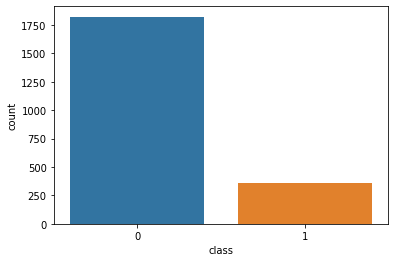

In [ ]:
print(Counter(data_new['class']))
sns.countplot(data_new['class'])
plt.show()

In [ ]:
#save dataframe to csv 
data_new.to_csv('/content/drive/MyDrive/Colab Notebooks/BreastCancerDataAugmented.csv', index=False)

## Importer le CSV des données augmentées 

In [ ]:
data_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BreastCancerDataAugmented.csv')

In [ ]:
X = data_new.iloc[:, 1:]
y = data_new.iloc[:, 0]



In [ ]:
X

,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,tumor-size_0-4,tumor-size_10-14,tumor-size_15-19,tumor-size_20-24,tumor-size_25-29,tumor-size_30-34,tumor-size_35-39,tumor-size_40-44,tumor-size_45-49,tumor-size_5-9,tumor-size_50-54,inv-nodes_0-2,inv-nodes_12-14,inv-nodes_15-17,inv-nodes_24-26,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,node-caps_no,node-caps_yes,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
2,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
3,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
4,2,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,3,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1
2182,2,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,0
2183,2,0,1,0,0,1,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1,0
2184,2,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2181    0
2182    0
2183    0
2184    0
2185    0
Name: class, Length: 2186, dtype: int64

**Feature importance**

In [ ]:
# feature importance
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_) 


[0.04581151 0.02221284 0.02483478 0.02676756 0.02705997 0.02707042
 0.02363797 0.02485845 0.02470924 0.02488679 0.01995117 0.02439121
 0.02773788 0.02676595 0.02686859 0.02771352 0.02589078 0.0265296
 0.02222546 0.02080873 0.02517944 0.02580301 0.02119469 0.02177718
 0.02216357 0.02517823 0.02379819 0.02053643 0.02351738 0.02441043
 0.02806857 0.02718403 0.02674729 0.02921541 0.02864968 0.02435418
 0.02861638 0.02618423 0.02668922]


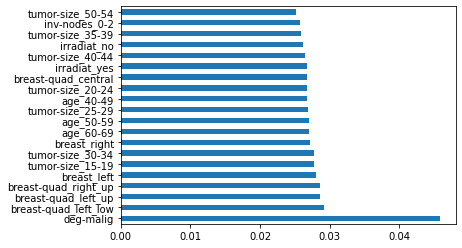

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**Correlation Matrix with Heatmap** 

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

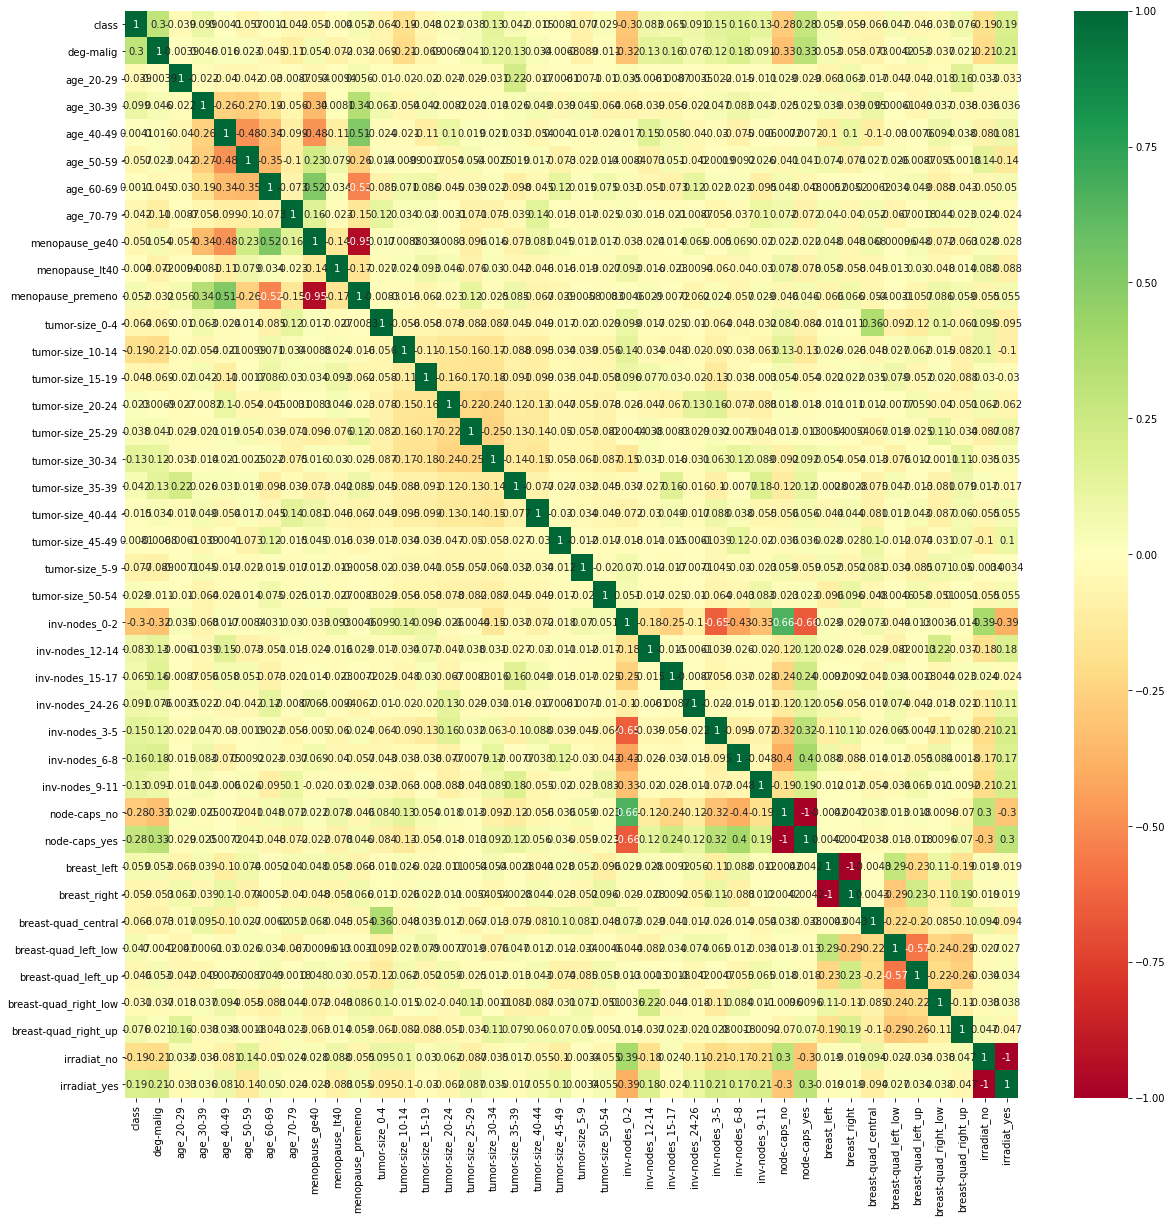

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [ ]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [ ]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (1464, 39) (1464,)
Test (722, 39) (722,)


**Feature selection using Chi squared**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=10)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs


In [ ]:
# feature selection
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)


# MLP

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.callbacks import EarlyStopping



In [ ]:
# Initialising the ANN
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(500, activation='relu', input_dim=10))
# Adding dropout to prevent overfitting
model.add(Dropout(0.4))

# Adding the second hidden layer 
model.add(Dense(200, activation='relu'))
# Adding dropout to prevent overfitting
model.add(Dropout(0.4))


# Adding the output layer
model.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
#optimizer = SGD(lr=0.01)
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

#Adding early stopping to stop training when test errors starts increasing

es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience = 30)

# Fitting the ANN to the Training set
print("Fit model on training data")
history = model.fit(
    X_train_fs,
    y_train,
    validation_data=(X_test_fs,y_test),
    batch_size=100,
    epochs=10,
    callbacks=[es]
)


Fit model on training data
Epoch 1/10
15/15 [==============================] - 1s 25ms/step - loss: 0.5857 - accuracy: 0.6658 - val_loss: 0.4454 - val_accuracy: 0.8421
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.4607 - accuracy: 0.8253 - val_loss: 0.4235 - val_accuracy: 0.8421
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.4456 - accuracy: 0.8226 - val_loss: 0.4139 - val_accuracy: 0.8421
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.4178 - accuracy: 0.8315 - val_loss: 0.4122 - val_accuracy: 0.8421
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.4204 - accuracy: 0.8274 - val_loss: 0.4103 - val_accuracy: 0.8421
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 0.3978 - accuracy: 0.8465 - val_loss: 0.4081 - val_accuracy: 0.8421
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.4359 - accuracy: 0.8229 - val_loss: 0.4082 - val_accuracy:

In [ ]:
#Evaluate the model on the test data 
print("Evaluate on test data")
results = model.evaluate(X_test_fs, y_test, verbose=0)
print("test loss, test acc:", results)

Evaluate on test data
test loss, test acc: [0.4052143394947052, 0.8421052694320679]


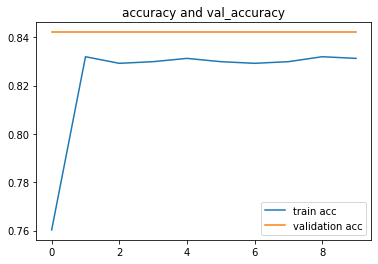

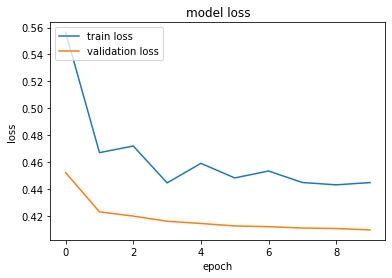

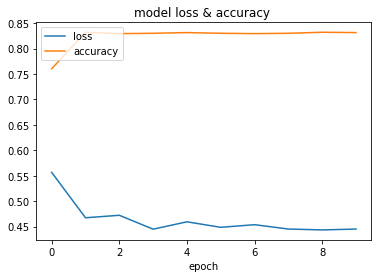

In [ ]:
# plot history for accuracy 
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.title("accuracy and val_accuracy")
plt.legend()
plt.show()



# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

# plot history for loss and accuracy 
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss & accuracy ')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

# SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
print('Before OverSampling, the shape of train_X: {}'.format(X_train_fs.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  

Before OverSampling, counts of label '1': 248
Before OverSampling, counts of label '0': 1216 

Before OverSampling, the shape of train_X: (1464, 10)
Before OverSampling, the shape of train_y: (1464,) 



In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 2)
X_smote, y_smote = smt.fit_sample(X_train_fs, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))

After OverSampling, the shape of train_X: (2432, 10)
After OverSampling, the shape of train_y: (2432,) 

After OverSampling, counts of label '1': 1216
After OverSampling, counts of label '0': 1216


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


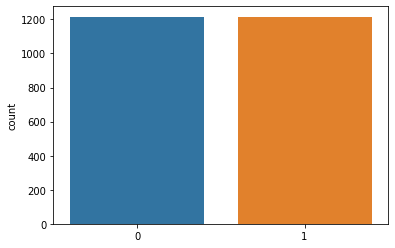

In [ ]:
sns.countplot(y_smote)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Initialising the ANN
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(500, activation='relu', input_dim=10))
# Adding dropout to prevent overfitting
model.add(Dropout(0.4))

# Adding the second hidden layer 
model.add(Dense(200, activation='relu'))
# Adding dropout to prevent overfitting
model.add(Dropout(0.4))


# Adding the output layer
model.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
#optimizer = SGD(lr=0.01)
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

#Adding early stopping to stop training when test errors starts increasing

es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience = 30)

# Fitting the ANN to the Training set
print("Fit model on training data")
history = model.fit(
    X_smote,
    y_smote,
    validation_data=(X_smote,y_smote),
    batch_size=100,
    epochs=17,
    callbacks=[es]
)



Fit model on training data
Epoch 1/17
25/25 [==============================] - 1s 18ms/step - loss: 0.6641 - accuracy: 0.5753 - val_loss: 0.5820 - val_accuracy: 0.6990
Epoch 2/17
25/25 [==============================] - 0s 8ms/step - loss: 0.5959 - accuracy: 0.6781 - val_loss: 0.5477 - val_accuracy: 0.7245
Epoch 3/17
25/25 [==============================] - 0s 6ms/step - loss: 0.5515 - accuracy: 0.7243 - val_loss: 0.5269 - val_accuracy: 0.7262
Epoch 4/17
25/25 [==============================] - 0s 6ms/step - loss: 0.5413 - accuracy: 0.7127 - val_loss: 0.5193 - val_accuracy: 0.7327
Epoch 5/17
25/25 [==============================] - 0s 7ms/step - loss: 0.5362 - accuracy: 0.7283 - val_loss: 0.5004 - val_accuracy: 0.7525
Epoch 6/17
25/25 [==============================] - 0s 6ms/step - loss: 0.5116 - accuracy: 0.7496 - val_loss: 0.4920 - val_accuracy: 0.7603
Epoch 7/17
25/25 [==============================] - 0s 7ms/step - loss: 0.5095 - accuracy: 0.7563 - val_loss: 0.4852 - val_accuracy:

In [ ]:
#Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test_fs, y_test, verbose=0)
print("test loss, test acc:", results)


Evaluate on test data
test loss, test acc: [0.603230357170105, 0.6495844721794128]


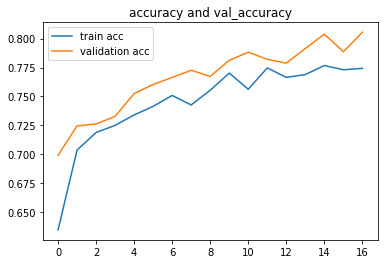

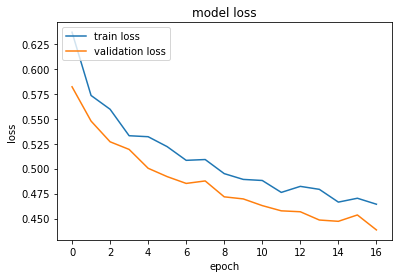

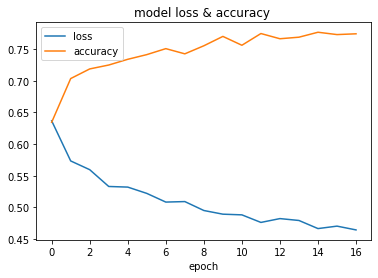

In [ ]:
# plot history for accuracy 
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.title("accuracy and val_accuracy")
plt.legend()
plt.show()



# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

# plot history for loss and accuracy 
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss & accuracy ')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()